In [ ]:
import tensorflow as tf


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8394,8395,15597983,Brown,692,France,Male,69,10,154953.94,1,1,1,70849.47,0
7982,7983,15665129,Kapustin,545,Germany,Male,33,1,132527.90,2,0,1,107429.71,0
7386,7387,15664083,Ulyanova,666,Germany,Female,37,2,158468.76,1,0,1,93266.01,0
5155,5156,15656426,Tyler,713,France,Female,42,3,0.00,2,0,0,82565.01,0
4469,4470,15692443,Piccio,612,Spain,Male,33,5,69478.57,1,1,0,8973.67,1


In [ ]:
df.drop('RowNumber',axis='columns',inplace=True)
df.drop('CustomerId',axis='columns',inplace=True)
df.drop('Surname',axis='columns',inplace=True)

In [ ]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


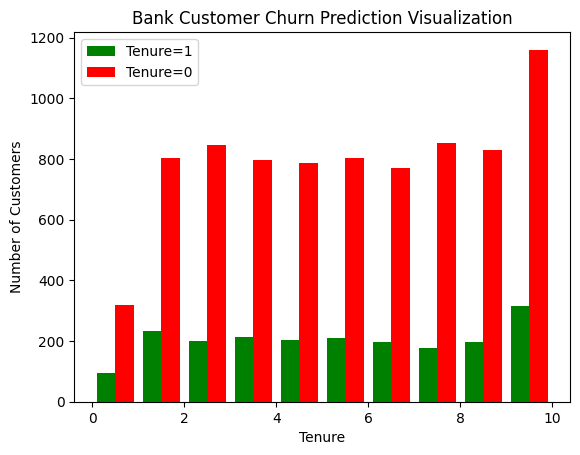

In [ ]:
tenure_Exited_No=df[df.Exited==0].Tenure
tenure_Exited_Yes=df[df.Exited==1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Bank Customer Churn Prediction Visualization")

plt.hist([tenure_Exited_Yes,tenure_Exited_No],color=['green','red'],label=['Tenure=1','Tenure=0'])
plt.legend()

In [ ]:
for column in df:
    print(f'{column}: {df[column].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [ ]:
def print_unique_col_values(df):
    for column in df:
         if df[column].dtypes=='object':
             print(f'{column}: {df[column].unique()}')

In [ ]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [ ]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)
df['Gender'].unique()

/tmp/ipython-input-3894982535.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Female':1,'Male':0},inplace=True)
/tmp/ipython-input-3894982535.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace({'Female':1,'Male':0},inplace=True)


array([1, 0])

In [ ]:
#one hot encoder
df1 = pd.get_dummies(data=df,columns=['Geography'],dtype=int)

In [ ]:
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [ ]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
4514,669,1,38,8,0.00,2,1,0,84049.16,0,1,0,0
3658,699,1,43,3,80764.03,1,1,0,199378.58,1,1,0,0
1101,703,0,29,9,0.00,2,1,0,50679.48,0,0,0,1
2084,423,1,36,5,97665.61,1,1,0,118372.55,1,1,0,0
5677,655,0,32,9,113447.01,1,1,0,82084.30,0,0,1,0


In [ ]:
df1.dtypes

,0
CreditScore,int64
Gender,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64
Exited,int64


In [ ]:
#scaling the columns between 0 and 1
cols_to_scale=['Tenure', 'Balance', 'EstimatedSalary','CreditScore']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [ ]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
6895,0.520,0,49,0.6,0.453899,1,1,0,0.979105,1,0,1,0
8571,0.834,1,42,0.2,0.532552,1,1,0,0.143035,0,1,0,0
2642,0.574,1,22,0.5,0.393785,1,1,0,0.614329,0,0,0,1
9244,0.392,1,25,0.3,0.529449,1,1,0,0.658242,0,0,1,0
9946,0.638,1,33,0.9,0.000000,2,0,1,0.536098,0,1,0,0


In [ ]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
X_train.shape

(8000, 12)

In [ ]:
X_test.shape

(2000, 12)

In [ ]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,1,39,0.6,0.000000,2,0,0,0.096273,0,0,1
4154,0.752,0,34,0.3,0.000000,2,1,0,0.981478,1,0,0
3881,0.476,1,64,0.3,0.000000,1,1,1,0.948551,1,0,0
9238,0.846,1,50,0.4,0.000000,2,1,0,0.646869,1,0,0
5210,0.402,0,35,0.7,0.517012,2,0,0,0.434670,1,0,0
7487,0.602,1,56,0.4,0.000000,1,0,0,0.421898,1,0,0
7542,0.314,1,34,0.4,0.000000,2,1,1,0.303413,0,0,1
7524,0.620,1,40,0.8,0.666330,1,1,1,0.925815,1,0,0
9412,0.750,0,26,0.6,0.393324,1,0,0,0.668609,1,0,0
6377,0.684,0,33,0.9,0.000000,1,1,0,0.567526,1,0,0


In [ ]:
len(X_train.columns)

12

In [ ]:
from tensorflow import keras

model = keras.Sequential([
 keras.layers.Dense(12,input_shape=(12,), activation='relu') ,
  keras.layers.Dense(1,activation='sigmoid') ,
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(X_train,y_train,epochs=100)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7664 - loss: 0.7439
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7904 - loss: 0.4845
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8008 - loss: 0.4563
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8112 - loss: 0.4437
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8128 - loss: 0.4354
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8136 - loss: 0.4419
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8218 - loss: 0.4202
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8162 - loss: 0.4316
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8127 - loss: 0.4394
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8144 - loss: 0.4329
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8150 - loss: 0.4368
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8340 - loss: 0.3813


[0.3809110224246979, 0.8330000042915344]

In [ ]:
y_predict = model.predict(X_test)
y_predict[:5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


array([[0.04060223],
       [0.06202275],
       [0.06694219],
       [0.06299254],
       [0.08201431]], dtype=float32)

In [ ]:
y_new_predict = []
for element in y_predict:
  if element > 0.5:
    y_new_predict.append(1)
  else:
      y_new_predict.append(0)

In [ ]:
y_new_predict[:15]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_new_predict))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1595
           1       0.71      0.30      0.42       405

    accuracy                           0.83      2000
   macro avg       0.78      0.63      0.66      2000
weighted avg       0.82      0.83      0.80      2000



Text(95.72222222222221, 0.5, 'Truth')

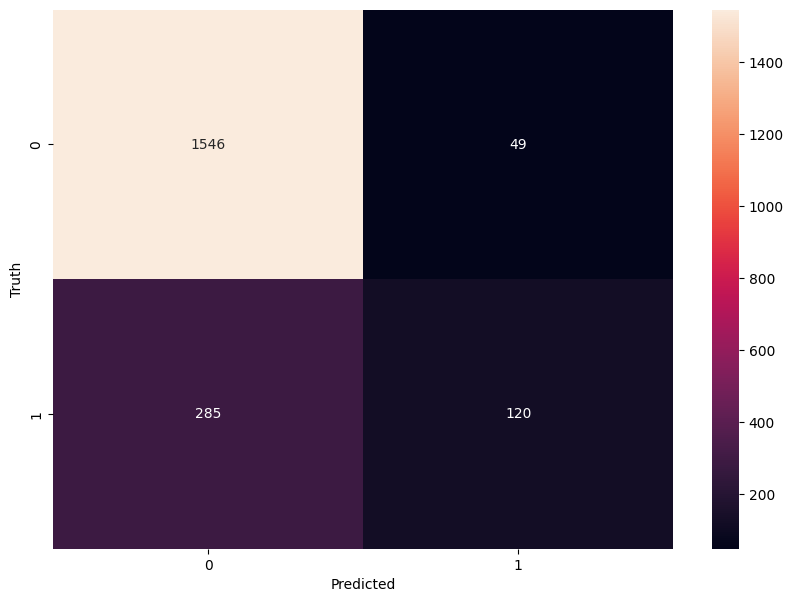

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_new_predict)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')